In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import factorial

In [101]:
# Исходная функция
def f(x):
    return (x - 1) ** 2 - np.exp(x) / 2

In [102]:
# Производная функции
def df(x, n):
    return - np.exp(x) / 2

In [103]:
# Интерполяционный полином
def L(x, points):
    res, size = 0, points.shape[0]

    for i in range(size):

        tmp = points['y'][i]

        for j in range(size):
            if i != j:
                tmp *= (x - points['x'][j]) / (points['x'][i] - points['x'][j])

        res += tmp

    return res

In [104]:
# Число известных узловых точек
n = 95

In [105]:
# Границы отрезка
a, b = [0.1, 0.6]

In [106]:
# Создание df с узловыми точками
tmp = np.linspace(a, b, n)

points = pd.DataFrame({'x': tmp, 'y': f(tmp)})

In [107]:
# Готовим данные для численного построения графика
l, r, delta = a, b, 0.01
X = np.linspace(l, r, int(1/delta))

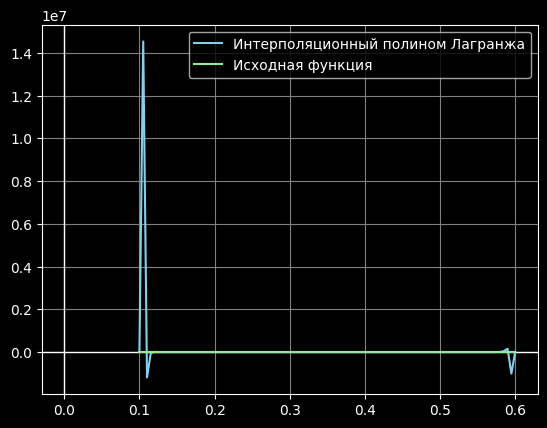

In [108]:
# Построение графика
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

# Точки
# for i in range(points.shape[0]):
#     plt.scatter(points['x'][i], points['y'][i], color='red', zorder=5)

plt.plot(X, L(X, points), color='skyblue', zorder=4, label='Интерполяционный полином Лагранжа')
plt.plot(X, f(X), color='lightgreen', zorder=4, label='Исходная функция')

plt.legend()
plt.grid(True, color='gray')

# plt.savefig('ex.jpeg', dpi=300)
plt.show()

In [109]:
# Поиск погрешностей
interval = np.linspace(a, b, 1000)

delta = np.max(np.abs(f(interval) - L(interval, points)))

partial = delta * 100 / np.max(np.abs(f(interval)))

print("Абсолютная погрешность: ", delta)
print("Норма функции: ", np.max(np.abs(f(interval))))
print("Относительная погрешность: ", partial, "%")

Абсолютная погрешность:  5453370422.445355
Норма функции:  0.7510594001952544
Относительная погрешность:  726090429202.7544 %


In [110]:
# Оценка остаточного члена в форме Лагранжа
r = np.max(np.abs(df(interval, n + 1))) * ((b - a) ** (n + 1)) / factorial(n + 1)

print("Оценка остаточного члена в форме Лагранжа: ", r)

Оценка остаточного члена в форме Лагранжа:  1.1595686347369291e-179
